In [39]:
# EMNIST CNN using Tensorflow
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import tensorflow as tf

# Note that keras and tf.keras are different
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from scipy import io as spio # for .mat file load

print('Tensorflow ',tf.__version__, '/ Keras ', tf.keras.__version__)

Tensorflow  1.14.0 / Keras  2.2.4-tf


In [40]:
# load EMNIST data in .mat format
emnist = spio.loadmat('datasets/emnist-letters.mat')

In [41]:
# load images
train_images = (emnist['dataset'][0][0]['train'][0][0]['images']).astype(np.float32)
test_images = (emnist['dataset'][0][0]['test'][0][0]['images']).astype(np.float32)

# load labels
train_labels = emnist['dataset'][0][0]['train'][0][0]['labels']
test_labels = emnist['dataset'][0][0]['test'][0][0]['labels']

In [58]:
# Preprocessing
# 0~255 scale to 0~1
train_images /= 255
test_images /= 255

# modify dimension for CNN
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1, order="A")
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1, order="A")

train_images.shape

(124800, 28, 28, 1)

In [59]:
# -1 to normalize 1~26 to 0~25
train_labels = keras.utils.to_categorical(train_labels - 1, 26)
test_labels = keras.utils.to_categorical(test_labels - 1, 26)

test_labels.shape

(20800, 26, 26)

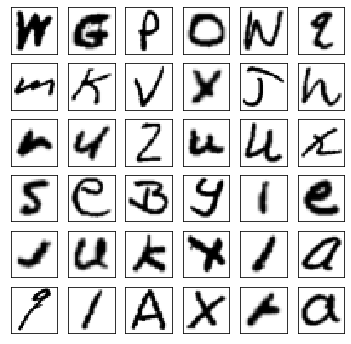

In [56]:
plt.figure(figsize=(6,6))
plt.axis('off')

for i in range(36):
    ax = plt.subplot(6,6,i+1)
    plt.imshow(train_images[i][:,:,0], cmap=cm.gray_r, interpolation='nearest')
    ax.axes.get_xaxis().set_visible(False) 
    ax.axes.get_yaxis().set_visible(False)
plt.show()

In [48]:
# Design model (CNN)
# TODO: reshape dataset
'''
# CNN
model = tf.keras.Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(26, activation=tf.nn.softmax)
])
''';


#'''
model = tf.keras.Sequential([
    Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
           activation='relu',
           input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(64, (2, 2), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(1000, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')
])
model.summary()
#''';

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)             

In [49]:
# Compile model
#'''
model.compile(optimizer='adam',
              #loss='sparse_categorical_crossentropy',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#'''

'''
sgd = tf.keras.optimizers.SGD(lr=0.1, decay=0.00022, momentum=0.5)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
''';


# Visualize model
tf.keras.utils.plot_model(model, show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [50]:
# Train model
train_history = model.fit(train_images, train_labels,
                          validation_data=(test_images, test_labels),
                          epochs=3,
                          #verbose=0,
                          batch_size=256
                         )

Train on 124800 samples, validate on 20800 samples
Epoch 1/3
124800/124800 [==============================] - 140s 1ms/sample - loss: 0.5976 - acc: 0.8142 - val_loss: 0.2654 - val_acc: 0.9135
Epoch 2/3
124800/124800 [==============================] - 136s 1ms/sample - loss: 0.2862 - acc: 0.9063 - val_loss: 0.2186 - val_acc: 0.9287
Epoch 3/3
124800/124800 [==============================] - 137s 1ms/sample - loss: 0.2414 - acc: 0.9193 - val_loss: 0.2006 - val_acc: 0.9335


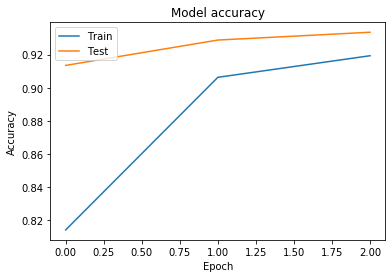

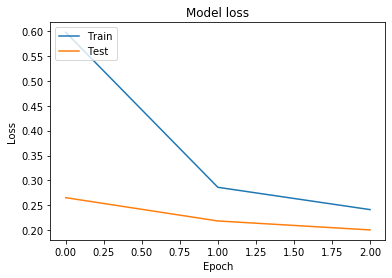

In [57]:
# Plot training history
# Accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()